# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [4]:
df = pd.read_csv('task_5/data/data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [19]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score


### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [6]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [25]:
def model_eval(model):
    
    model.fit(X_train, y_train)
    
    # Generate predictions here!
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics here!
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nROC AUC Score:", roc_auc_score(y_test, y_proba))

    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title("ROC Curve - Random Forest")
    plt.show()
    
    importances = pd.Series(model.feature_importances_, index=X.columns)
    importances.nlargest(10).plot(kind='barh')
    plt.title("Top 10 Important Features")
    plt.xlabel("Feature Importance")
    plt.gca().invert_yaxis()
    plt.show()



Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.71      0.05      0.10       366

    accuracy                           0.90      3652
   macro avg       0.81      0.53      0.53      3652
weighted avg       0.89      0.90      0.86      3652


Confusion Matrix:
 [[3278    8]
 [ 346   20]]

Accuracy: 0.9030668127053669

ROC AUC Score: 0.6648810652245493


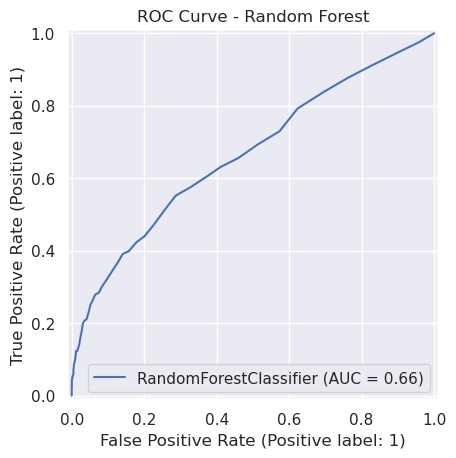

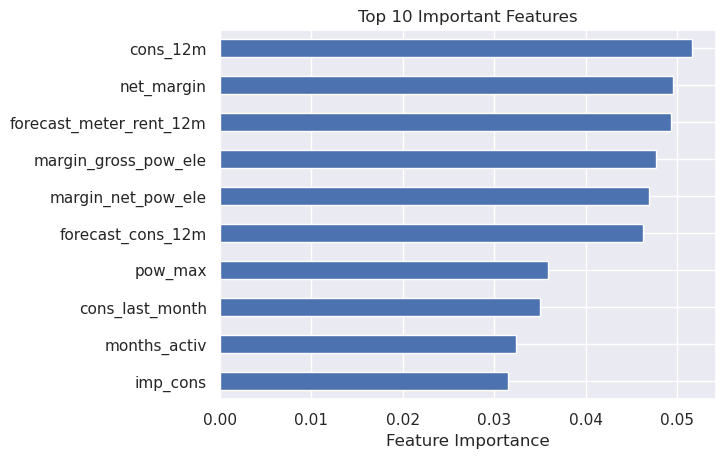

In [28]:
# Add model training in here!
model_rf = RandomForestClassifier(n_estimators=100, random_state=42) # Add parameters to the model!
model_eval(model_rf)

You're seeing an accuracy of ~90%, which might seem great at first glance — but the classification report and confusion matrix tell a more nuanced story. Here's a clear breakdown:

🔍 1. Accuracy
Accuracy: 90.3%

This means your model correctly predicted ~90% of the samples.

But given class imbalance, this is misleading.

⚠️ 2. Class Imbalance
Your churn classes are imbalanced:

Class 0 (Not churned): 3286

Class 1 (Churned): 366

This means about 90% of the data is non-churners, so a model that always predicts "not churned" would also get ~90% accuracy.

[[3278    8]     → 3278 True Negatives, 8 False Positives...
 [ 346   20]]    → 346 False Negatives, 20 True Positives

For churners (class 1):
Your model only correctly identified 20 churners out of 366.

That’s a recall of ~5%, which is very low.

So, it's missing most churners — which is the actual business problem you're trying to solve.



📈 4. Classification Metrics
Metric	Class 1 (Churners)	Interpretation
Precision	0.71	71% of churn predictions were correct. Not bad — but not many churners were predicted at all.
Recall	0.05	Very poor. Only 5% of actual churners were identified.
F1-score	0.10	Harmonic mean of precision and recall is very low.

🎯 5. ROC AUC Score
AUC = 0.664

This indicates moderate ability to distinguish churners from non-churners.

Better than random (0.5), but not strong.

🔍 6. Conclusion
❌ Is model performance satisfactory?
No — especially for class 1 (churners), which is your target.

The model:

Learns to correctly predict non-churners.

Fails badly at detecting churners (low recall = bad for retention strategy).

Likely suffers from class imbalance.

#### To improve performance:

Class Weighting:


Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.83      0.05      0.10       366

    accuracy                           0.90      3652
   macro avg       0.87      0.53      0.53      3652
weighted avg       0.90      0.90      0.86      3652


Confusion Matrix:
 [[3282    4]
 [ 346   20]]

Accuracy: 0.9041621029572837

ROC AUC Score: 0.6547511549245183


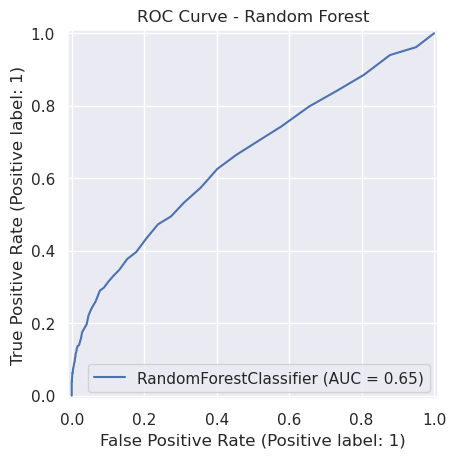

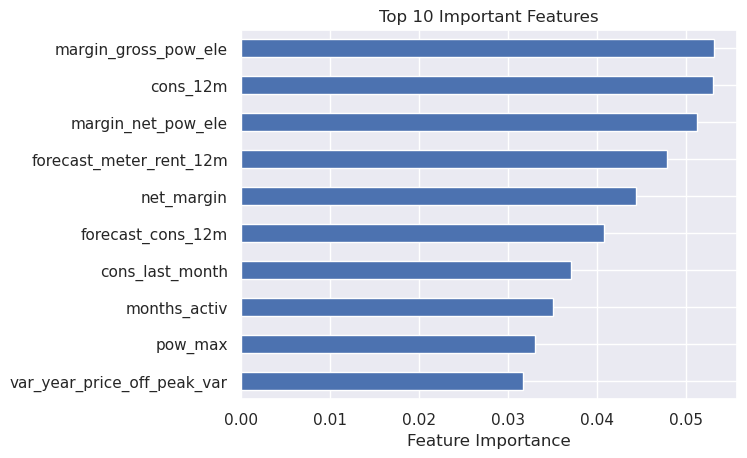

In [29]:
model_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
model_eval(model_balanced)

✅ What improved:
Metric	Before (Unbalanced)	After (Balanced)	Comments
Precision (churners)	0.71	0.83	Higher — more of the churn predictions were correct.
Recall (churners)	0.05	0.05	🔴 Still very low — model still catches only ~5% of actual churners.
Accuracy	0.903	0.904	Barely changed — expected due to class imbalance.
AUC	0.665	0.655	Slightly lower — possibly due to overfitting or trade-off shift.

📉 Key Issue: Still Low Recall for Churners
The biggest problem remains:

The model still fails to detect most churners (346 churners in test, only 20 detected).

In a churn prediction context, recall is critical. Missing churners means lost customers and revenue — even if accuracy is high.

🧠 Why Class Weight Didn’t Help Much
Class weighting adjusted the penalty for misclassifying churners, but the underlying imbalance in actual sample size remains.

Random Forests are robust but don’t always respond dramatically to class weights alone.

🔁 What to Try Next
1. 🔄 Resampling (SMOTE or Random Oversampling)
Upsample churners to balance the training data.

Use:

```
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
```

This forces the model to learn churn patterns better.

2. 🎚️ Lower the Prediction Threshold
The default threshold is 0.5. Lowering it can improve recall:
```
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.3).astype(int)
```
This will increase churn detection (recall), at the cost of precision.

3. 📈 Feature Importance Review
Use model.feature_importances_ to check what features drive predictions.

Maybe churners have subtler signals being ignored.

✅ Summary
Area	Status
Recall for churners	❌ Still too low (5%)
Precision for churners	✅ High (83%)
Accuracy & AUC	✅ Acceptable
Action Needed	Try SMOTE / threshold tuning